In [90]:
import numpy as np
import matplotlib.pyplot as plt

In [92]:
from sklearn.datasets import make_blobs

# Import and Explore Data

In [95]:
data = make_blobs(n_samples=100, n_features=3,centers=2,random_state=101)

In [97]:
data

(array([[  0.99429187,   0.87511711,  -9.99909683],
        [  0.65761885,   0.91624771, -10.18458517],
        [ -6.48804352,   3.29034852,   6.73159871],
        [  0.5815206 ,   2.06249948,  -9.07157495],
        [ -7.42442678,   5.30835517,   6.86341624],
        [  2.26790487,   0.40816482, -10.17230518],
        [  1.62073713,  -0.05416228,  -9.92461083],
        [  2.41199108,   1.03683306,  -9.20017913],
        [ -7.62441747,   5.87096075,   5.41069708],
        [ -7.34160752,   3.671108  ,   7.36634568],
        [ -7.56358517,   3.5736335 ,   5.34284552],
        [  2.22972735,   1.6514787 ,  -7.43386319],
        [ -0.75249891,   2.31574949,  -9.26873428],
        [  0.54946324,   0.5581557 ,  -7.88852506],
        [ -0.4308995 ,   0.48011452,  -8.47545896],
        [ -1.19436032,   2.54705473,  -8.90232874],
        [ -0.06318407,   2.4416449 , -11.40312057],
        [ -6.70999871,   3.8246846 ,   7.34365184],
        [  1.32054601,   2.60559237, -10.47729501],
        [  0

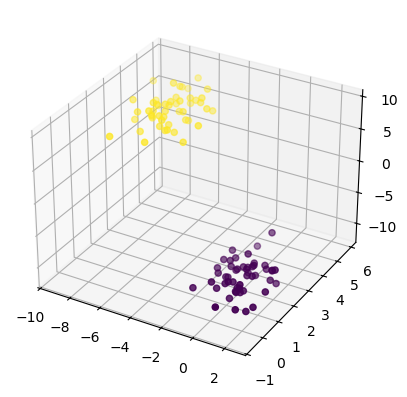

In [99]:
from mpl_toolkits.mplot3d import Axes3D

features = data[0]  # 3차원으로 된 100개의 데이터

data_x = features[:,0]  # 100개의 데이터중 제일 첫 열에 있는 데이터들
data_y = features[:,1]  # 두번째 열 데이터들
data_z = features[:,2]  # 세번째 열 데이터들


fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# Define Simple Linear Autoencoder

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model
from tensorflow import keras

In [149]:
keras.backend.clear_session()

model = Sequential()

model.add(Dense(2, activation="relu", input_shape=(3,)))
model.add(Dense(3, activation="relu"))

model.compile('adam', 'mse')
#param 개수는 입력노드 수 * 출력노드 수 + 바이어스 노드 수.

In [151]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [169]:
model.fit(features, features, epochs=10, batch_size=8)  
# 입력과 출력이 동일한 것을 통해 이것이 오토인코더라는 것을 알 수 있다. 
# 전체 데이터셋을 10번 반복학습하는 것이고, 배치사이즈는 학습할때 데이터를 8개씩 묶어서 처리 즉, 100개의 데이터가 있으니 13번의 업데이트가 일어나는 것.

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 26.5817
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 27.2653
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 26.2556
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - loss: 27.3610
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 26.6311
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 26.1827
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 25.4599
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - loss: 25.7562
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 25.9490
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 25.7723


# Plot Regular Output

In [172]:
outputs_reg = model.predict(features)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


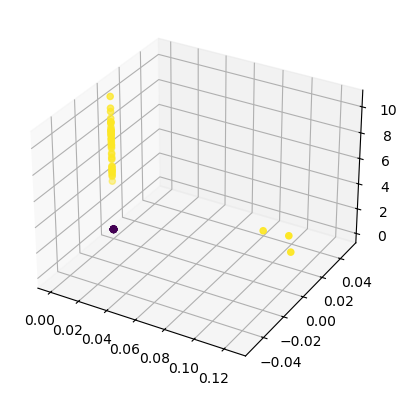

In [174]:
data_x = outputs_reg[:,0]
data_y = outputs_reg[:,1]
data_z = outputs_reg[:,2]

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

# Plot Compressed Output

In [183]:
model_compressed_output = Model(inputs=model.inputs,
                                outputs=model.get_layer('dense_1').output)
# 원래 모델의 입력층 (3,)을 넣고, dense_1이라는 이름의 출력값을 모델에 넣어 새로운 모델 정의 
# 이 서브 모델은 입력을 받아서 특정 중간레이어(여기서는 dense_1)의 출력까지만 계산하는 모델이다. 
# 전체 오토인코더가 입력 -> 인코더 -> 디코더 -> 출력이라면, 이 서브모델은 입력 -> 인코더까지만 계산해서 잠재벡터(latent vector)를 추출한다. 

In [185]:
out_compressed = model_compressed_output.predict(features)
# 이 out_compressed는 차원이 낮고, 의미 있는 정보만 추출된 벡터이다. -> 시각화나 클러스터링, 전이학습에 활용 가능하다. 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


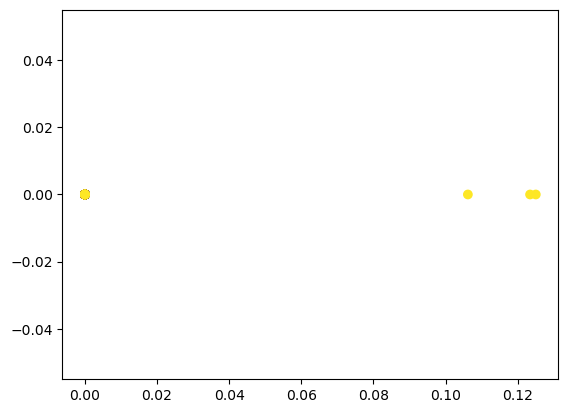

In [187]:
plt.scatter(out_compressed[:,0], out_compressed[:,1], c=data[1])

In [167]:
weights = model.layers[0].get_weights()[0]
weights
# model.layers[0] 모델의 첫번째 레이어(여기서는 dense 층)에서 get_weights()를 통해 학습된 가중치와 편향을 가져온다. [0]을 통해 가중치만 가져옴. 
# model.add(Dense(2, activation="relu", input_shape=(3,)))  여기서 입력은 3차원, 출력은 2차원으로 가중치의 shape은 (3, 2)이고, 
# [1]을 가져오면 bias를 가져올 수 있고, shape는 (2,)이다.

array([[ 0.07646009,  0.3734955 ],
       [-0.19572267, -0.44779932],
       [ 0.9204189 ,  0.83895284]], dtype=float32)